In [30]:
%matplotlib inline

In [35]:
import os

os.chdir('/home/esther/Desktop/BehavioralTraining/code')

from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices

from strategyFunctions import simulateStrategies

from scoringFunctions import scorePerPhase
from scoringFunctions import scoreStrategy
from scoringFunctions import scoreChoicesUnfiltered

from plottingFunctions import plotIt

from rtDistFunctions import computeDensityForStrategy

In [3]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

In [4]:
#%% load data
Adat,Mdat = loadData()

In [5]:
#%% PREPROCESS DATA (get sides and choices)
choices, sides = preProcessChoices(Adat, Mdat)

#%% join dataframes to feed into simulation loop
sideChoices = makeSideChoices(sides,choices)

preprocessingFunctions.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/esther/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.where(-key, value, inplace=True)
preprocessingFunctions.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/esther/anaconda/lib/python2.7/site-packages/panda

In [6]:
WinStay, WinShift, Alt = simulateStrategies(sideChoices)

# Actual Scores
*Daily scores of the animals over the course of training*

In [7]:
Scores = scorePerPhase(Adat,Mdat)

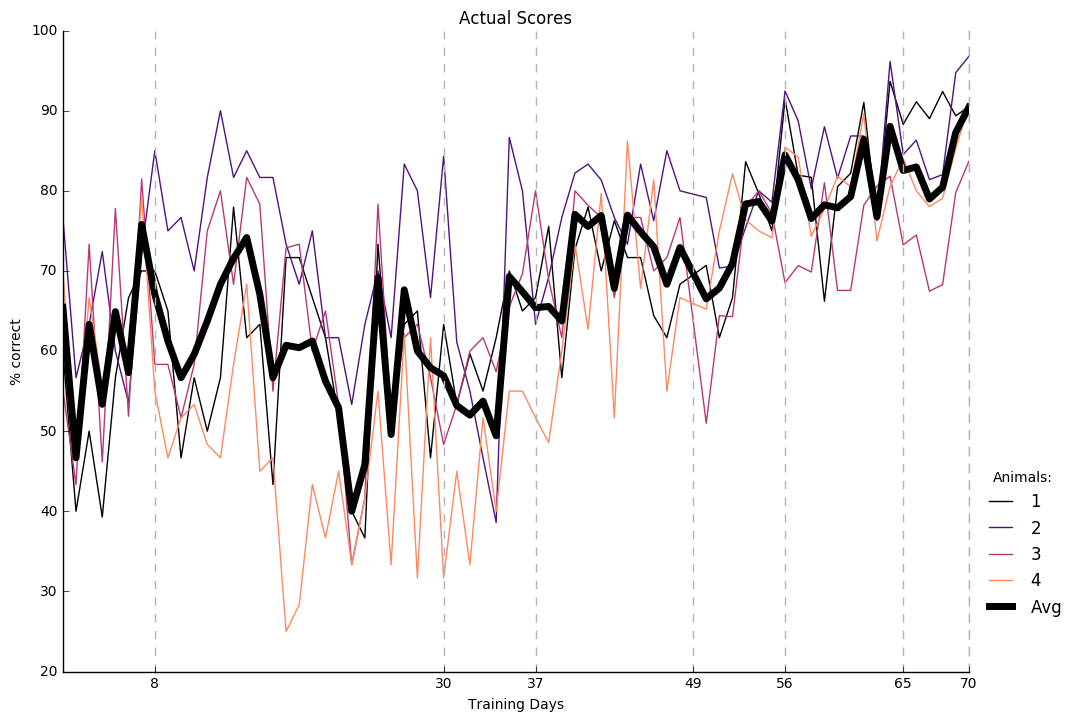

In [32]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

## Strategy Scores
_How the animals would have scored had they applied these strategies_

### Win-Stay Scores

In [15]:
winStayScores = scoreStrategy(WinStay,sides)

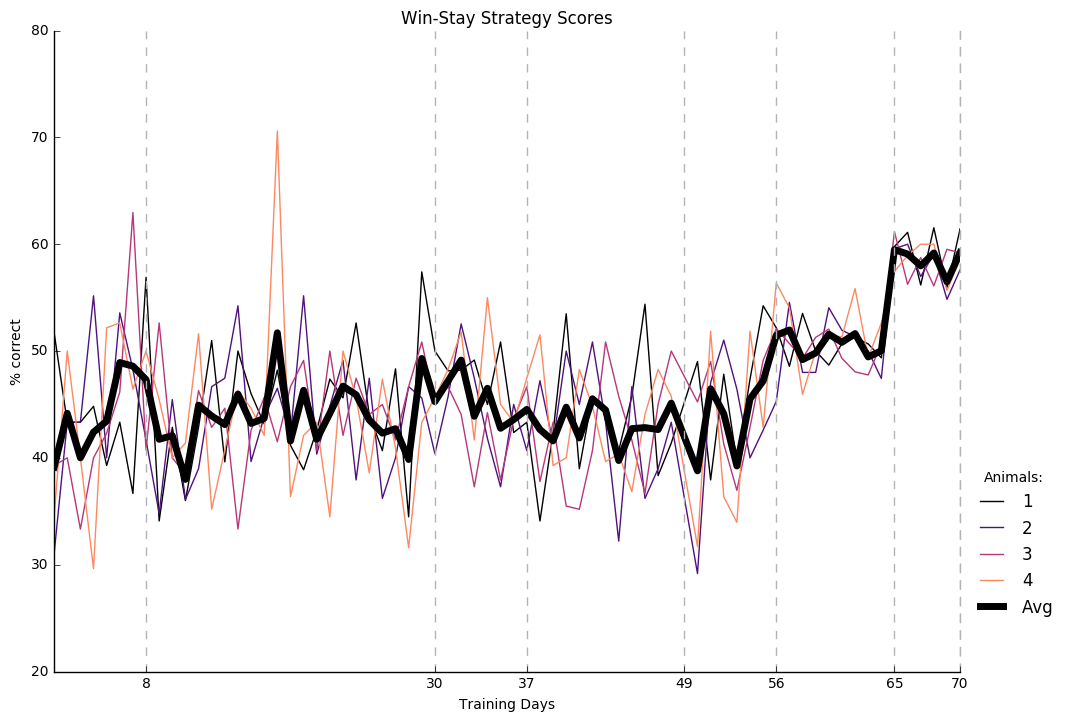

In [16]:
plotIt(winStayScores, title = "Win-Stay Strategy Scores", ylabel = "% correct", Phase = False, Norm = False)

### Win-Shift Scores

In [19]:
# calculate score if rat had used purely a win-shift strategy (same randomization)
winShiftScores = scoreStrategy(WinShift,sides)

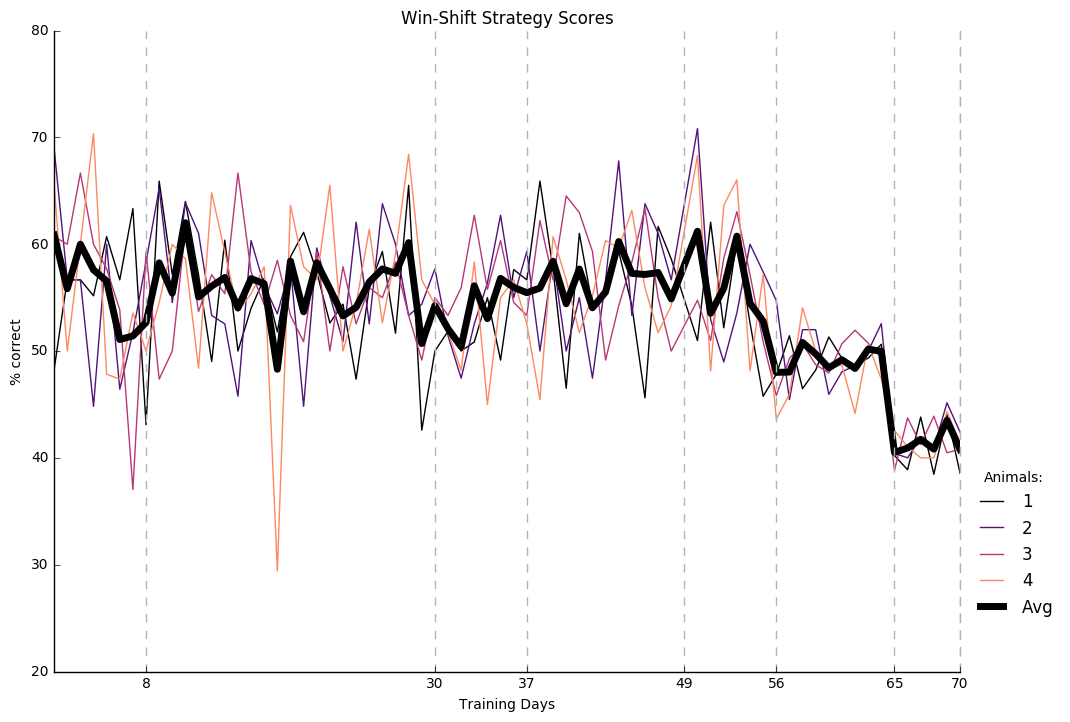

In [20]:
plotIt(winShiftScores, title = "Win-Shift Strategy Scores", ylabel = "% correct", Phase = False, Norm = False)

### Alternation Scores

In [22]:
# calculate score if rat had used purely an alternation strategy (same randomization)
altScores = scoreStrategy(Alt,sides)

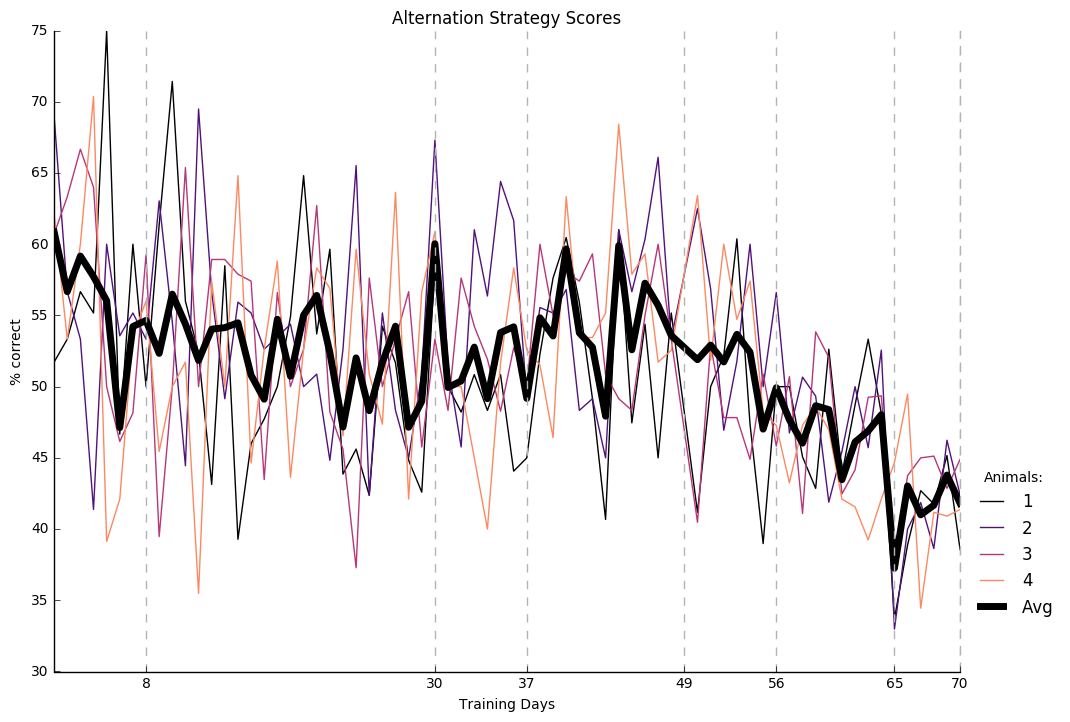

In [23]:
plotIt(altScores, title = "Alternation Strategy Scores", ylabel = "% correct", Phase = False, Norm = False)

# Animal Scores On Use Of Strategies
*Score strategy against animals choices, to what degree do the animals choices overlap with the strategies?*

### Win-Stay Overlap

In [26]:
# calculate score if rat had used purely a win-shift strategy (same randomization)
winStayOverlap = scoreStrategy(WinStay,choices)

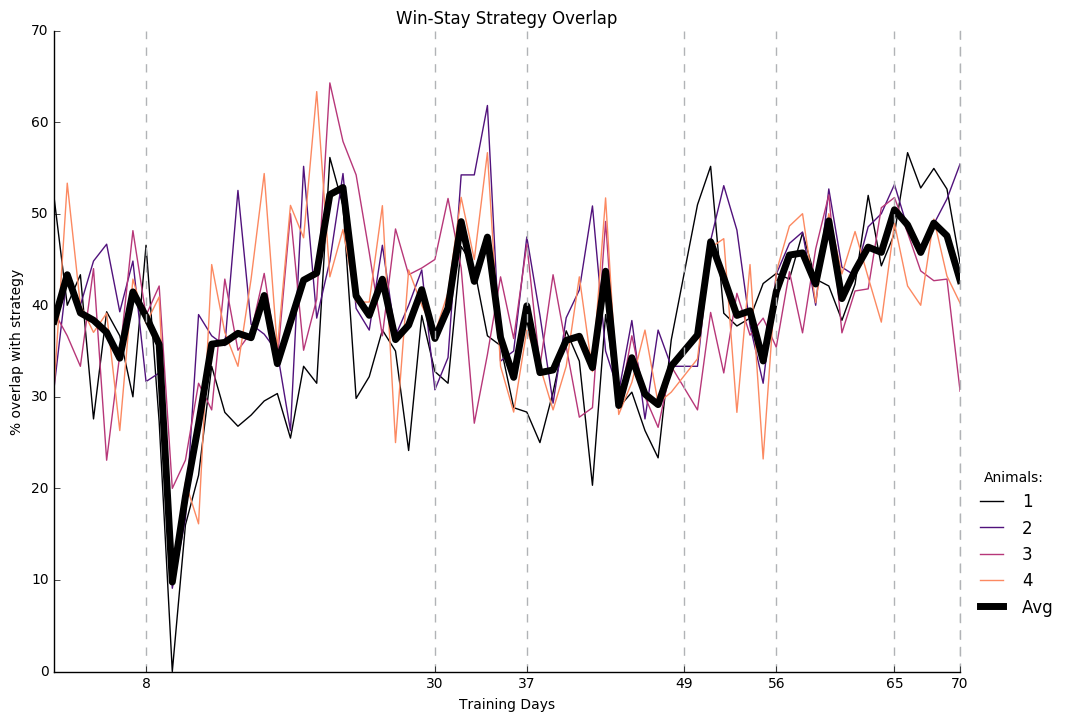

In [27]:
plotIt(winStayOverlap, title = "Win-Stay Strategy Overlap", ylabel = "% overlap with strategy", Phase = False, Norm = False)

### Win-Shift Overlap

In [28]:
# calculate score if rat had used purely a win-shift strategy (same randomization)
winShiftOverlap = scoreStrategy(WinShift,choices)

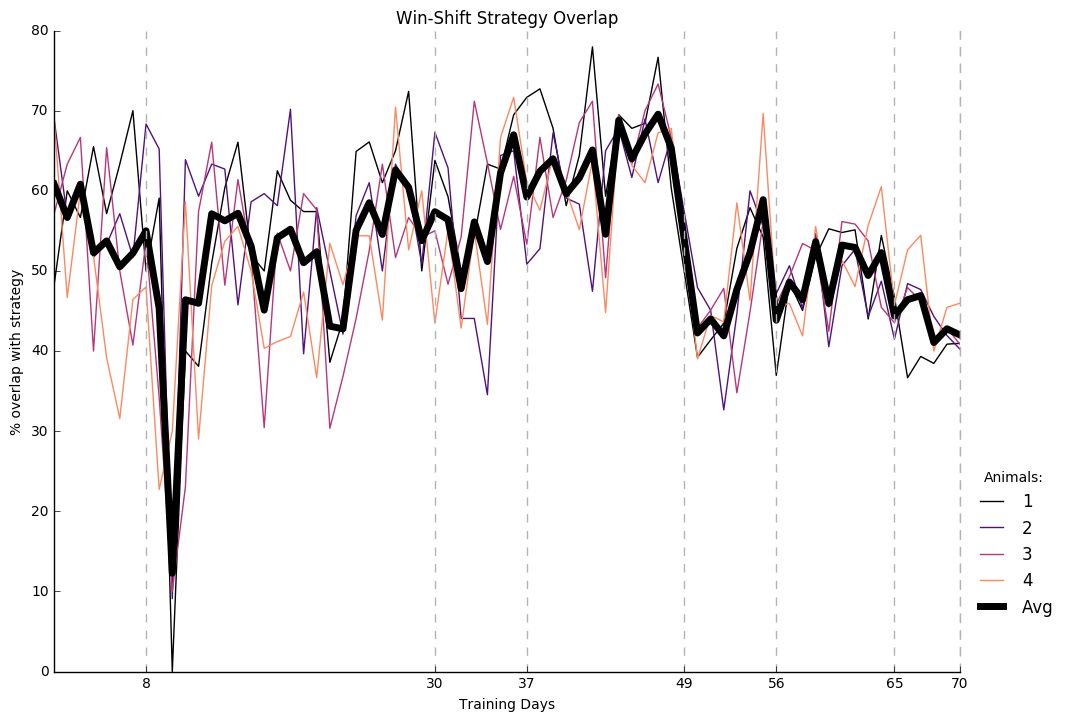

In [29]:
plotIt(winShiftOverlap, title = "Win-Shift Strategy Overlap", ylabel = "% overlap with strategy", Phase = False, Norm = False)

### Alternation Overlap

In [24]:
# calculate overlap between animal choices and alternation strategy
altOverlap = scoreStrategy(Alt,choices)

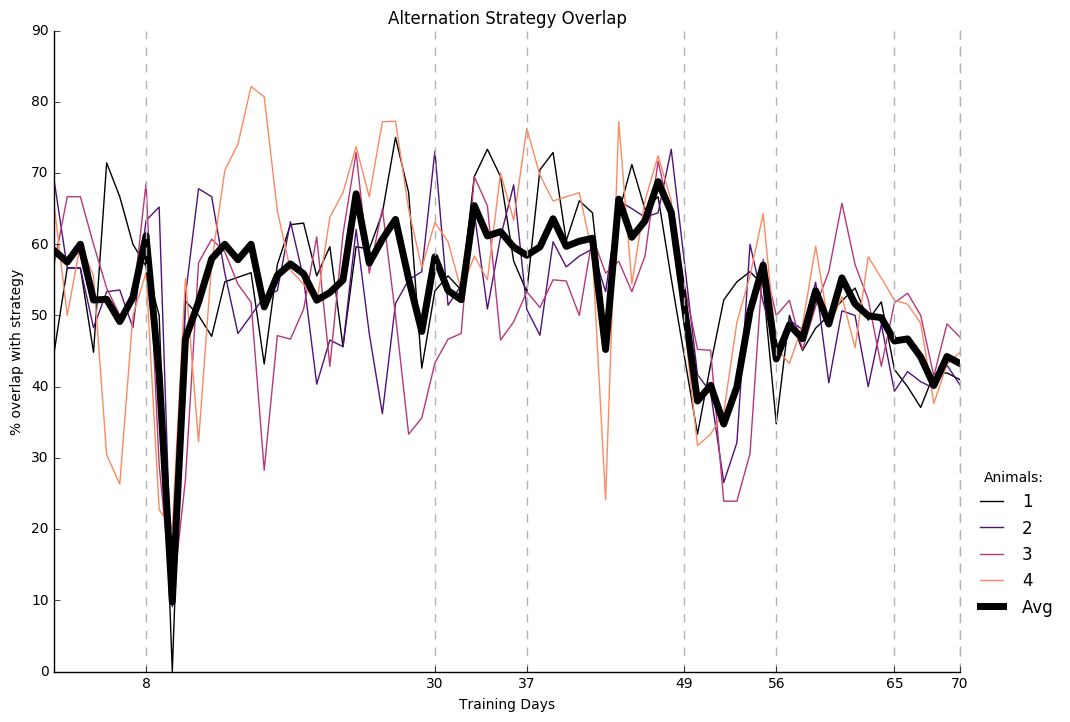

In [25]:
plotIt(altOverlap, title = "Alternation Strategy Overlap", ylabel = "% overlap with strategy", Phase = False, Norm = False)

# Reaction Times

In [38]:
rt = Adat.xs('reaction_time',level = 1, axis = 1) 
rtFiltered = rt[rt>100]

## Win-Stay Strategy

In [36]:
strategyApplied, strategyNotApplied, nTotalTrials = scoreChoicesUnfiltered(WinStay,choices)

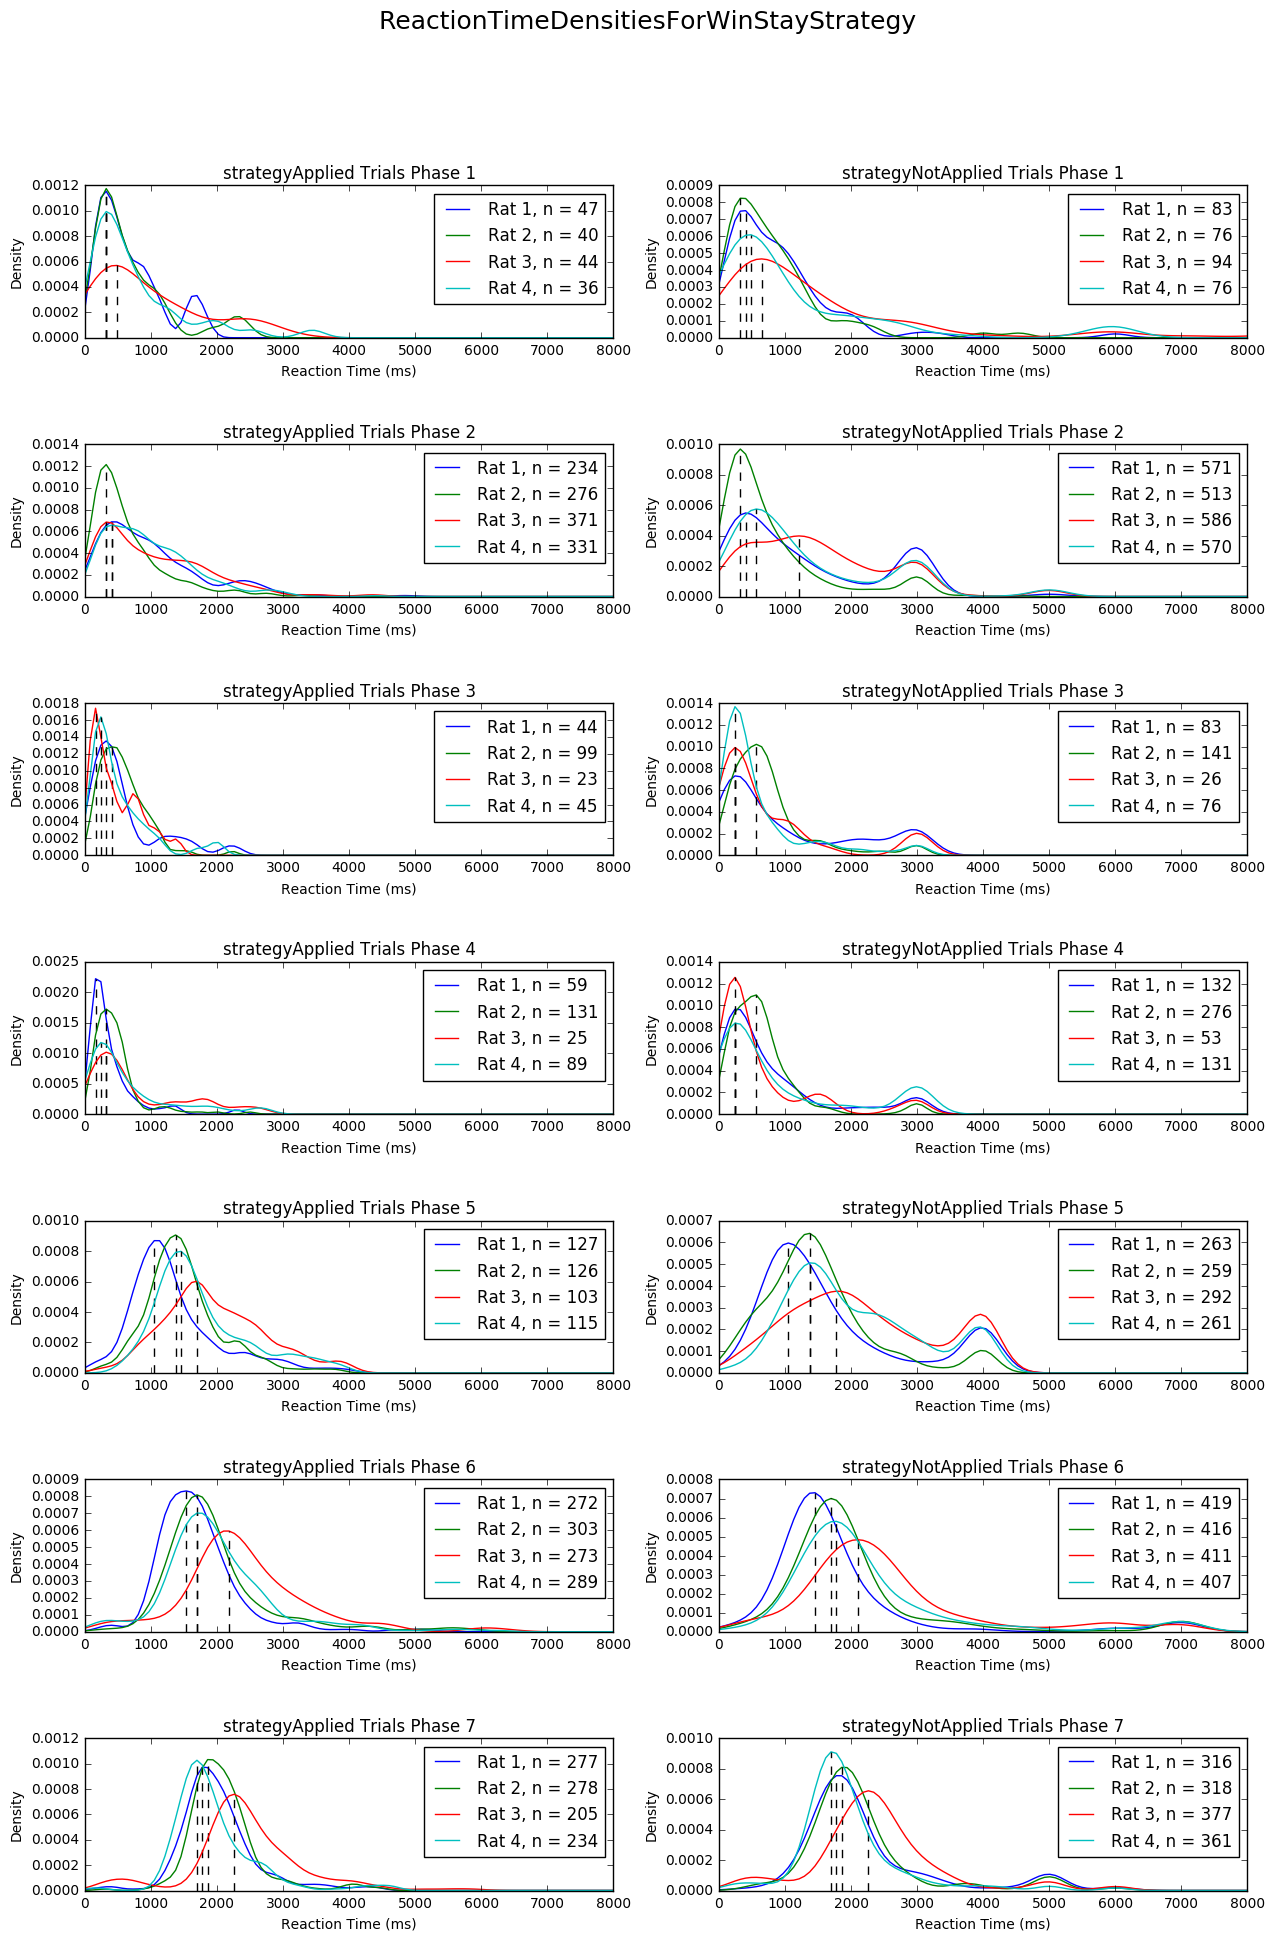

In [39]:
computeDensityForStrategy(rtFiltered, strategyApplied, strategyNotApplied, figname = "ReactionTimeDensitiesForWinStayStrategy", mode = True)

## Win-Shift Strategy

In [43]:
strategyApplied, strategyNotApplied, nTotalTrials = scoreChoicesUnfiltered(WinShift,choices)

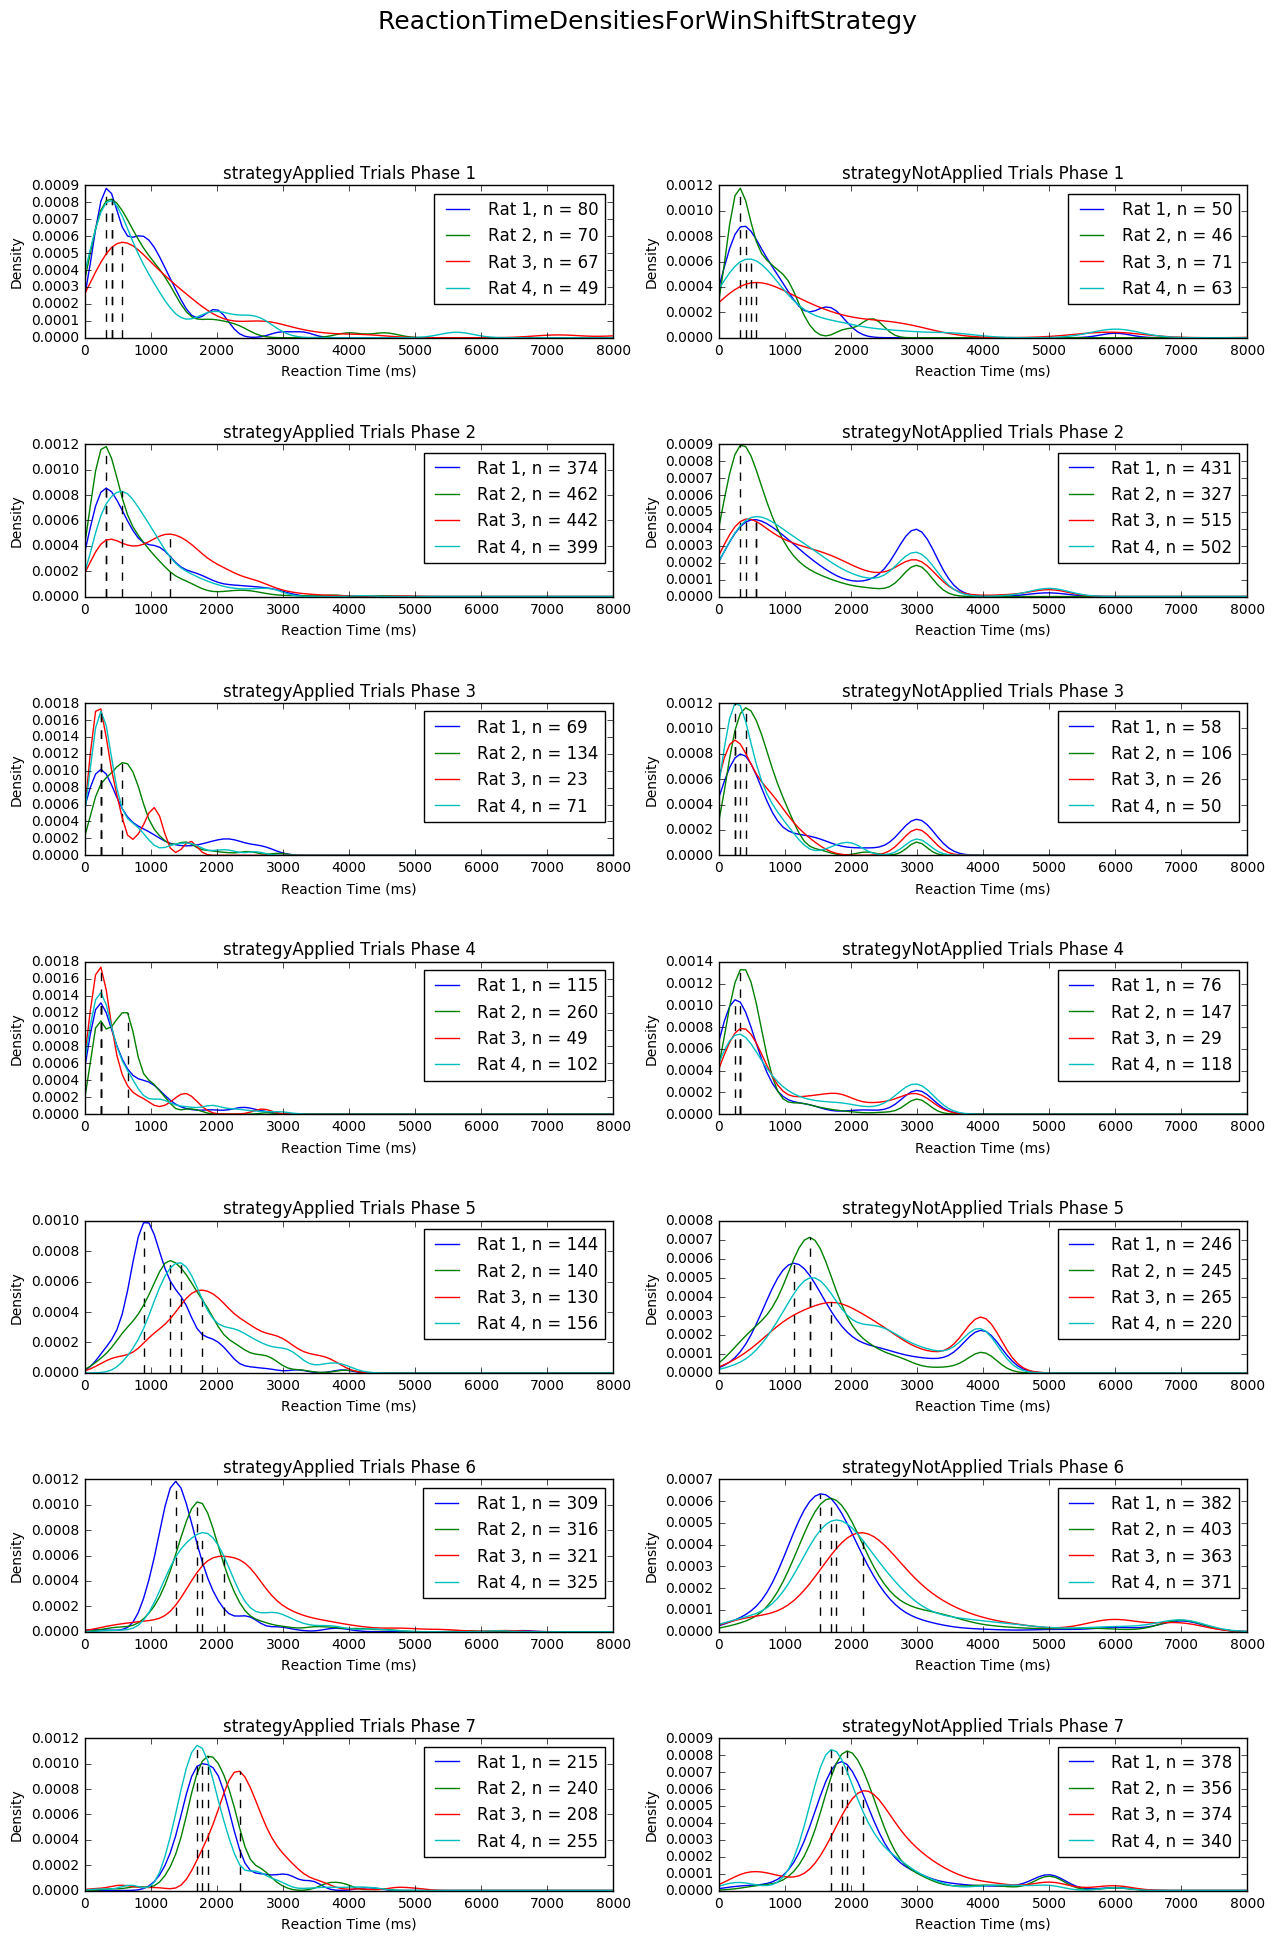

In [44]:
computeDensityForStrategy(rtFiltered, strategyApplied, strategyNotApplied, figname = "ReactionTimeDensitiesForWinShiftStrategy", mode = True)

## Alternation Strategy

In [45]:
strategyApplied, strategyNotApplied, nTotalTrials = scoreChoicesUnfiltered(Alt,choices)

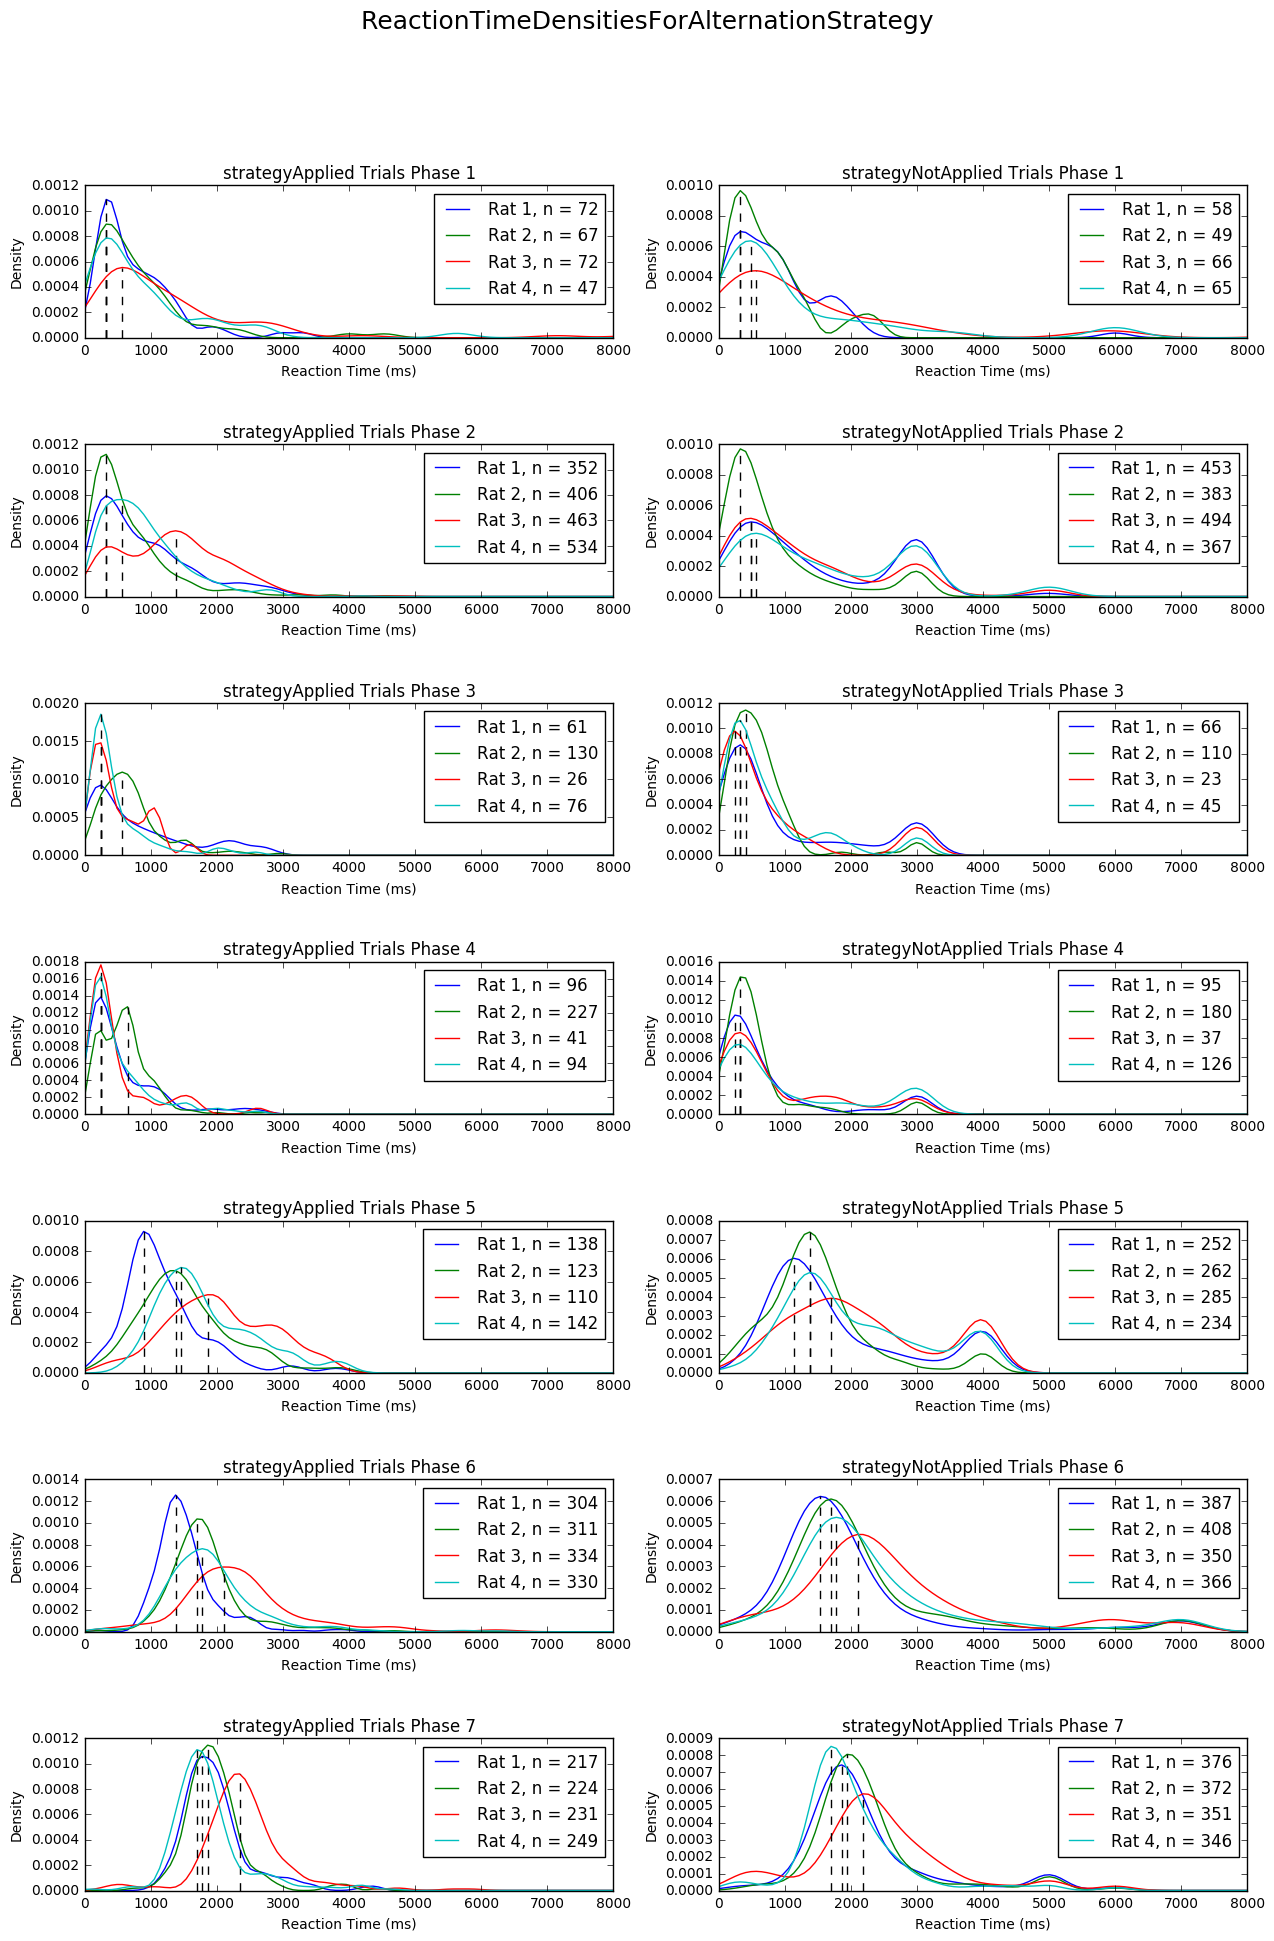

In [46]:
computeDensityForStrategy(rtFiltered, strategyApplied, strategyNotApplied, figname = "ReactionTimeDensitiesForAlternationStrategy", mode = True)